## Exploratory data analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Gender vs Loan_Status

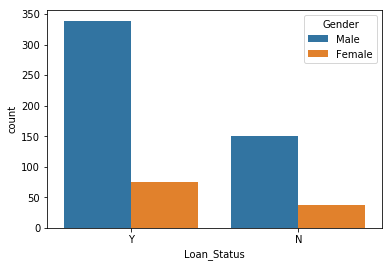

In [3]:
ax=sns.countplot(x="Loan_Status",hue="Gender",data=df)

### Gender vs Married

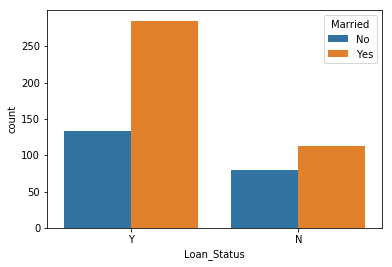

In [4]:
bx=sns.countplot(x="Loan_Status",hue="Married",data=df)

### Education vs Loan_Status

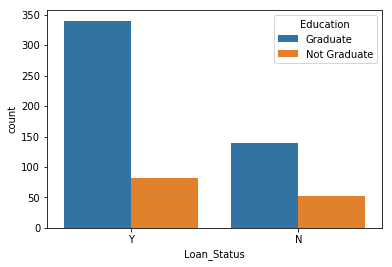

In [5]:
bx=sns.countplot(x="Loan_Status",hue="Education",data=df)

### Loan_Status vs Property_Area

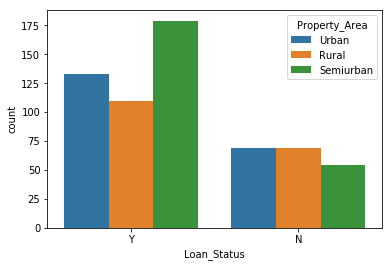

In [6]:
bx=sns.countplot(x="Loan_Status",hue="Property_Area",data=df)

### Credit_History vs Loan_Status

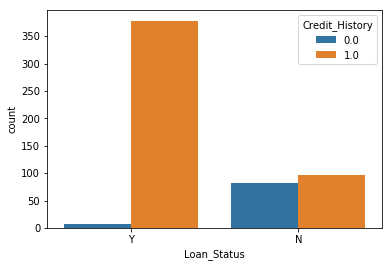

In [7]:
bx=sns.countplot(x="Loan_Status",hue="Credit_History",data=df)

## Feature Engineering and dealing with categorical variable and scaling

In [8]:
train=np.array(df)
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
Gender_Num=pd.get_dummies(df.Gender).iloc[:,0]
Dependents_Num=pd.get_dummies(df.Dependents).iloc[:,[0,1,2]]
Self_Employed_Num=pd.get_dummies(df.Self_Employed)
Self_Employed_Num=Self_Employed_Num.iloc[:,1]
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360)

Property_Code=pd.get_dummies(df.Property_Area).iloc[:,[0,1]]


a=np.array(df.LoanAmount)
a=a.reshape(-1,1)
scaler1=MinMaxScaler()
scaler1.fit(a)
a=scaler1.transform(a)
df.LoanAmount=pd.DataFrame(a)

b=np.array(df.ApplicantIncome)
b=b.reshape(-1,1)
scaler2=MinMaxScaler()
scaler2.fit(b)
b=scaler2.transform(b)
df.ApplicantIncome=pd.DataFrame(b)

c=np.array(df.Loan_Amount_Term)
c=c.reshape(-1,1)
scaler3=MinMaxScaler()
scaler3.fit(c)
c=scaler3.transform(c)
df.Loan_Amount_Term=pd.DataFrame(c)


d=np.array(df.CoapplicantIncome)
d=c.reshape(-1,1)
scaler4=MinMaxScaler()
scaler4.fit(d)
d=scaler4.transform(d)
df.CoapplicantIncome=pd.DataFrame(d)

A=pd.concat([Gender_Num,Dependents_Num,Self_Employed_Num,Property_Code,df.LoanAmount,df.ApplicantIncome,df.Loan_Amount_Term,df.CoapplicantIncome],axis=1)
B=pd.concat([df.LoanAmount,df.ApplicantIncome,df.Loan_Amount_Term,df.CoapplicantIncome],axis=1)
Y_train=pd.get_dummies(df.Loan_Status).iloc[:,1]


## Dimensionality reduction with principal component analysis (PCA)

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(A)
A_transformed=pd.DataFrame(pca.transform(A))
X_train=pd.concat([A_transformed,B],axis=1)

## Building models 

### Logistic_Regression

#### Scoring=accuracy

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
param={'C':[0.001,0.01,0.1,1,10,100]}
models=GridSearchCV(LogisticRegression(),param,cv=5,scoring='accuracy')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'C': 0.001}
0.6872964169381107


#### scoring: Recall

In [13]:
param={'C':[0.001,0.01,0.1,1,10,100]}
models=GridSearchCV(LogisticRegression(),param,cv=5,scoring='recall')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'C': 0.001}
1.0


#### scoring:Precision

In [14]:
param={'C':[0.001,0.01,0.1,1,10,100]}
models=GridSearchCV(LogisticRegression(),param,cv=5,scoring='precision')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'C': 100}
0.6874059069882024


## SVM 

In [15]:
from sklearn.svm import SVC
param={'C':[0.001,0.01,0.1,1,10,100]}
models=GridSearchCV(SVC(),param,cv=5,scoring='accuracy')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'C': 0.001}
0.6872964169381107


In [16]:
from sklearn.svm import SVC
param={'C':[0.001,0.01,0.1,1,10,100]}
models=GridSearchCV(SVC(),param,cv=5,scoring='recall')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'C': 0.001}
1.0


In [17]:
from sklearn.svm import SVC
param={'C':[0.001,0.01,0.1,1,10,100]}
models=GridSearchCV(SVC(),param,cv=5,scoring='precision')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'C': 0.001}
0.6872964169381107


## Gradient Boosting Tree

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
param={'max_depth':[1,3],'loss':['deviance','exponential'],'n_estimators':[5,10,15,20],'learning_rate':[0.001,0.01,0.1,0.15]}
models=GridSearchCV(GradientBoostingClassifier(),param,cv=5)
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 10}
0.6905537459283387


In [19]:
from sklearn.ensemble import GradientBoostingClassifier


param={'max_depth':[1,3],'loss':['deviance','exponential'],'n_estimators':[5,10,15,20],'learning_rate':[0.001,0.01,0.1,0.15]}
models=GridSearchCV(GradientBoostingClassifier(),param,cv=5,scoring='recall')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 1, 'n_estimators': 5}
1.0


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
param={'max_depth':[1,3],'loss':['deviance','exponential'],'n_estimators':[5,10,15,20],'learning_rate':[0.001,0.01,0.1,0.15]}
models=GridSearchCV(GradientBoostingClassifier(),param,cv=5,scoring='precision')
models.fit(X_train,Y_train)
print(models.best_params_)
print(models.best_score_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 10}
0.6920790282893785
